In [9]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute, transpile
from qiskit.tools.visualization import plot_histogram

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qasm_sim = Aer.get_backend("qasm_simulator")

In [23]:
# Create circuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
#qc.measure_all()
qc.measure([0,1], [0,1])

# Transpile for simulator
qc = transpile(qc, aer_sim)

# Run and get counts
counts = aer_sim.run(qc, shots=888).result().get_counts()
plot_histogram(counts, title='Bell-State counts')
print(counts)
type(counts)
print(counts.keys())
counts_22 = counts["00"] if "22" in counts.keys() else 0
print(counts_22)

{'11': 437, '00': 451}
dict_keys(['11', '00'])
0


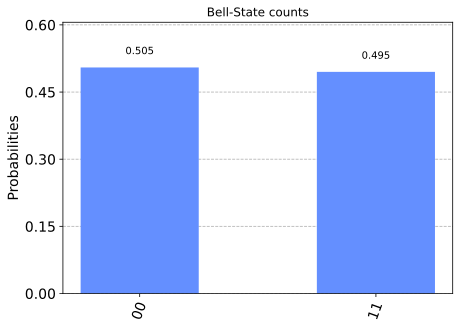

In [13]:
# Run and get counts using "execute" and aer_sim
shots = 1024
counts = execute(qc, aer_sim, shots=shots).result().get_counts()
plot_histogram(counts, title='Bell-State counts')

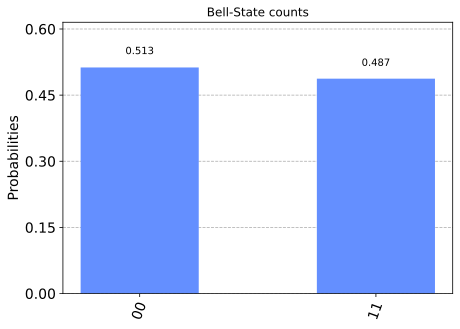

In [16]:
# Run and get counts using "execute" and qasm_sim
shots = 1024
counts = execute(qc, aer_sim, shots=shots).result().get_counts()
plot_histogram(counts, title='Bell-State counts')

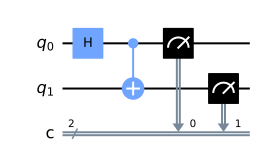

In [24]:
qc.draw()